# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Procesamiento de Lenguaje Natural (NLP)**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

### **Nombres y matrículas de los integrantes del equipo:**
-Diego Alonso Luna Ramirez - A01793035

-José Javier Granados Hernández - A0056717

-Jorge Fernández Lara - A01793062

-Kevin Brandon Cruz Mejía -A01794176

## **Adtividad de la Semana 10**
### **GPT y Web-Scraping.**

## Instrucciones
En la actividad de esta semana trabajarás en equipos mediante el uso del Transformer GPT y
comentarios de usuarios obtenidos mediante WebScraping en Tripadvisor.

A través de Tripadvisor ( https://www.tripadvisor.es/ ) en español obtendremos los comentarios de
usuarios sobre su experiencia en un hotel en particular. En esta plataforma se evalúa la experiencia
mediante puntos de 1 a 5, que corresponden de manera ascendente a “Pésimo”, “Malo”, “Normal”,
“Muy bueno” y “Excelente”.

Una de las formas en que se han venido utilizando los generadores de texto como el GPT, es para
generar datos sintéticos de texto que no tengan problemas de privacidad. En particular en esta actividad
los usaremos para generar datos sintéticos sobre comentarios positivos y negativos de usuarios y
posteriormente los usaremos para ver si ayudan a mejor el desempeño de un modelo de clasificación.
De la siguiente liga de Tripadvisor selecciona un hotel en la zona de la ciudad de Monterrey, México, que
consideres adecuado para extraer los comentarios de español y evaluaciones de usuarios:
https://www.tripadvisor.es/Hotels-g150782-Monterrey_Northern_Mexico-Hotels.html

En particular trata de seleccionar algún hotel cuyas calificaciones consideres desbalanceadas, al verlo
como un problema binario: Positivo (4, 5) y Negativo (1, 2 3). 


# Actividad 1
Mediante web scraping realiza una extracción de los comentarios y calificaciones a dicho hotel. Recuerda que Tripadvisor representa las calificaciones mediante círculos verdes. Los comentarios deben ser de usuarios que los redactaron en idioma en español. Indica la cantidad de comentarios y sus calificaciones que extrajiste. 

In [40]:
#!pip install selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import os
import time
import datetime
import re
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC


In [5]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()
driver.get('https://www.tripadvisor.com.mx/Hotel_Review-g150782-d1563601-Reviews-Mision_Monterrey_Centro_Historico-Monterrey_Northern_Mexico.html#REVIEWS')
df = pd.DataFrame(columns=['Comentario', 'Score'])
extractionDate = str(datetime.datetime.now().date())

nextBtn = True
#commentlenguage = 'inglés'
commentlenguage = 'español'
#commentlenguage = 'portugués'
urls = []

e=0
time.sleep(5)
#driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#idiomacom = driver.find_elements(by=By.XPATH,value="/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[1]/div[1]/div[4]/ul/li[2]/label/span[1]")
#idiomacom[0].click()                            
ActionChains(driver).double_click(WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,"//span[contains(text(),'%s')]"%commentlenguage)))).perform()
#ActionChains(driver).double_click(WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,"/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[1]/div[1]/div[4]/ul/li[2]/label/span[1]")))).perform()
time.sleep(5)


#classatribute = driver.find_elements(by=By.XPATH,value="//span[@id='component_15']/div/div[3]/div[3]/div[2]/div[1]/div/span").getAttribute("class")
#print(classatribute.get_attribute("class"))
pages=1
while(nextBtn):
    time.sleep(1)
    driver.execute_script("window.scrollTo(3500, 4500);")
    count= 3
    for i in range(5):
        auxString = ''
        auxStringC = ''
        auxReg = ''
        #time.sleep(2)
        try:
            try:
                auxString = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[%s]/div[2]/div[1]/div/span"%count))).get_attribute("class") 
                auxReg = re.findall("(.{2})\s*$", auxString)
                #print(auxReg[0])
                auxStringC =  WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[%s]/div[2]/div[3]/div[1]/div[1]/span/span"%count))).text
                #print(auxString)
            except:
                auxString = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[%s]/div[2]/div[2]/div/span"%count))).get_attribute("class")
                auxReg = re.findall("(.{2})\s*$", auxString)
                #print(auxReg[0])
                auxStringC =  WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[%s]/div[2]/div[4]/div[1]/div[1]/span/span"%count))).text
                #print(auxString)
        except:
            print("Sintax Xpath Changed")
        #print(count)
        #auxReg[0] = re.findall("(?s:.*)0", auxReg[0])
        count = count + 1
        if len(auxStringC) > 0:
            #print(auxReg[0][:-1])
            data = {'Comentario':auxStringC, 'Score':auxReg[0][:-1]}
            #print(data)
            new_df = pd.DataFrame([data])
            df = pd.concat([df, new_df], axis=0, ignore_index=True)
    time.sleep(1)
    if pages==1:
        next = driver.find_elements(by=By.XPATH,value="/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[8]/div/a")
    else:
        next = driver.find_elements(by=By.XPATH,value="/html/body/div[2]/div[2]/div[2]/div[9]/div/div[1]/div[1]/div/div/div[3]/div[8]/div/a[2]")
    #print(next)
    if len(next)>0:
        next[0].click()   
    else:
        nextBtn = False
    #print(pages)
    pages=pages+1
    
driver.close()




Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed
Sintax Xpath Changed


In [7]:
print("Total comments: ",len(df))
print(df.head(10))  
import pathlib
dirname = os.path.abspath(os.getcwd())
print(dirname)
csvfilename = 'TripAdvisor.csv'
df.to_csv(csvfilename, encoding='utf-8-sig')

Total comments:  636
                                          Comentario Score
0  El servicio de recepción es muy bueno departe ...     5
1  El recorrido que nos otorgó la señorita Ana Cr...     5
2  Excelente atención y establecimiento, la atenc...     5
3  Excelente servicio, muy atentos y agradable am...     5
4  Una agradable experiencia ya que atendieron to...     5
5  Fue una estancia muy agradable, con un excelen...     5
6  Excelente servicio muy a gusto y agradable amb...     5
7  Al llegar la atención por la señorita isabela ...     5
8  Todo exelente, muy buen servicio y la atención...     5
9  Durante la estancia todo genial, trato muy ama...     5
/Users/javiergranados/Downloads


In [41]:
df1 = pd.read_csv('TripAdvisor.csv', usecols=['Score'])
dups = df1.groupby(df1.columns.tolist()).size().reset_index().rename(columns={0:'count'})


In [3]:
dups['percent'] = (dups['count'] / 
                  dups['count'].sum()) * 100

In [4]:
print(dups.sort_values('percent'))

   Score  count    percent
2      3     50   7.861635
1      2     51   8.018868
0      1     66  10.377358
3      4     93  14.622642
4      5    376  59.119497


# Actividad 2

Para considerarlo como un problema binario, convierte las calificaciones a valores de 0 (comentario negativo) y 1 (comentario positivo).
1. En particular indica cómo considerarás las calificaciones entre 3 y 4, como 3.5, por ejemplo. Justifica la decisión tomada.
2. Indica la proporción de comentarios positivos y negativos que tienes ahora. 


In [5]:
# Code
# Read the original df with comments and score
df1 = pd.read_csv('TripAdvisor.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df1

,Comentario,Score
0,El servicio de recepción es muy bueno departe ...,5
1,El recorrido que nos otorgó la señorita Ana Cr...,5
2,"Excelente atención y establecimiento, la atenc...",5
3,"Excelente servicio, muy atentos y agradable am...",5
4,Una agradable experiencia ya que atendieron to...,5
...,...,...
631,así que tuve la oportunidad de estancia de 5 n...,5
632,Horrible. horrible. Barato y desagradable. Me ...,1
633,Me he alojado allí sólo una noche y el servici...,2
634,"El servicio normal, las habitaciones están sie...",4


Text(0.5, 1.0, 'Histograma de Frecuencia de Puntuación del Hotel')

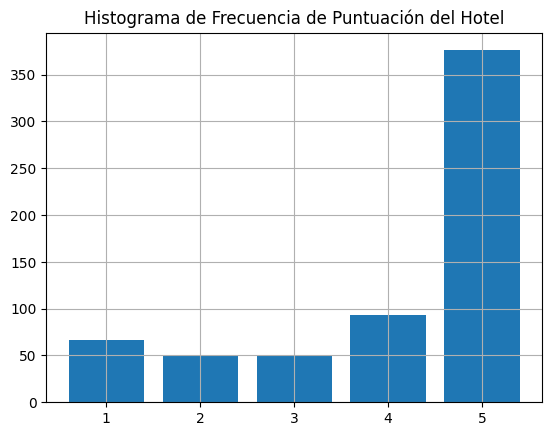

In [7]:
# See histogram of scores
import matplotlib.pyplot as plt
_ = df1.groupby('Score').count()

fig, ax = plt.subplots(1,1)
ax.bar(_.index, _.Comentario)
ax.grid(True)
ax.set_title('Histograma de Frecuencia de Puntuación del Hotel')


Número de Palabras en comentarios con calificación 1 sin contar stopwords:  211


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javiergranados/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


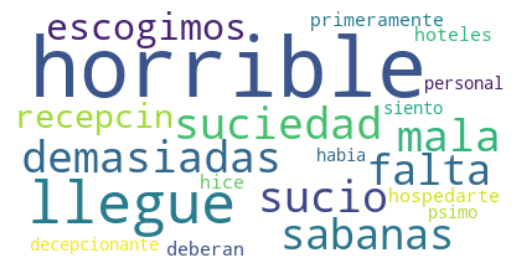

Número de Palabras en comentarios con calificación 2 sin contar stopwords:  124


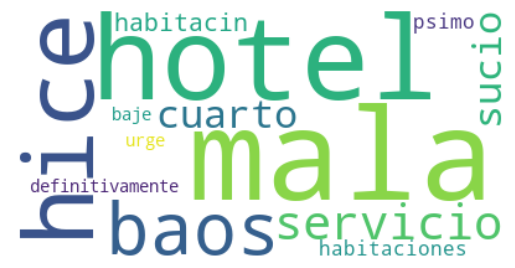

Número de Palabras en comentarios con calificación 3 sin contar stopwords:  119


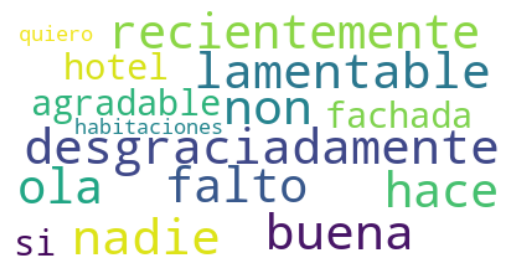

Número de Palabras en comentarios con calificación 4 sin contar stopwords:  217


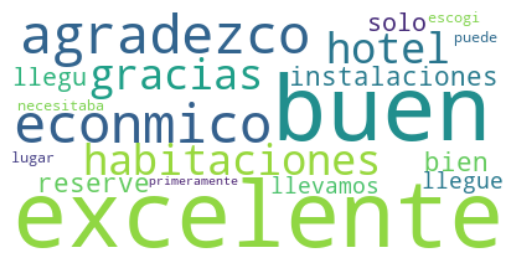

Número de Palabras en comentarios con calificación 5 sin contar stopwords:  1314


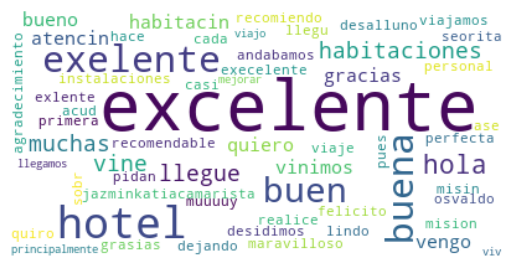

In [30]:
#WordCloud per punctuation
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('spanish')

def makeCloud(score):
    text1 = [x.split()[0].lower() for x in df1[df1.Score == score]['Comentario']]
    text1 = [re.sub(r'[^A-Za-z ]', '',x) for x in text1]
    text1 = ' '.join([x for x in text1 if x not in sw])
    print(f'Número de Palabras en comentarios con calificación {score} sin contar stopwords: ', len(text1))
    # Creating word_cloud with text as argument in .generate() method
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)
    # Display the generated Word Cloud
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

makeCloud(1)
makeCloud(2)
makeCloud(3)
makeCloud(4)
makeCloud(5)


# Comentario de Actividad 2

Para entender la información provista por los usuarios que calificaron el Hotel Misión Monterrey. Se usó un histograma para contar las calificaciones otorgadas al hotel.
Vemos que las clificaciones de 5 son las más frecuentes y representan el 59% de las calificaciones. 

Con el fin de re definir de manera binaria la naturaleza de los comentarios. Se optó por crear nubes de palabras; eliminando stopwords, utilizando la librería nltk. De las nubes de palabras podemos ver adjetivos utilizados en los comentarios y el número número de palabras usadas para crear la nube. Destacan adjetivos muy negativos en conjuntos con clasificación 1 dos y 3. aunque en 3 también hay adjetivos positivos. 

Se optó por definir los conjuntos de calificaciones entre 1 y 3 como negativos. Algo a considerar podría ser el caso de las puntuaciones de 3, que a veces se ven como "neutrales" en lugar de "negativas". Sin embargo, si se observa que los comentarios asociados a estas puntuaciones tienden a ser más negativos que positivos (como sugieren las nubes de palabras Los conjuntos 4 y 5 serán positivos. Los conjuntos 4 y 5 serán positivos. En los siguientes pasos se muestra cómo se trató el desbalance de contenido por categorías


# Actividad 3

Selecciona y aplica un modelo Transformer generador de texto en español de la plataforma de HuggingFace para “balancear” los porcentajes de comentarios positivos y negativos. Indica la cantidad de datos sintéticos que vas a generar, en particular contesta las siguientes
preguntas:
1. ¿Vas a generar solo datos de la clase negativa minoritaria o de ambas clases? ¿Por qué?
2. ¿Qué porcentaje de nuevo balanceo de clases vas a generar? ¿Por qué?

NOTA: Recuerda que no siempre es lo mejor balancearlos al 50% cada clase, porque si el conjunto original está demasiado desbalanceado y los datos sintéticos generados son de muy buena calidad, los resultados obtenidos al final podrían ser bastante desastrosos. 

In [1]:
#Install libraries
#!pip install transformers
#!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:0000:0100:01


In [32]:
# Code
from transformers import pipeline
from transformers import set_seed
import random
set_seed(42)

#Generación de un review en inglés
#Adjetivos Negativos usados en los comentarios negativos de otros usuarios
negative_adjectives = ["dirty",
    "dingy",
    "unhygienic",
    "neglected",
    "grimy",
    "run-down",
    "dilapidated",
    "shabby",
    "poorly-maintained",
    "cluttered",
    "cramped",
    "unpleasant",
    "decrepit",
    "musty",
    "outdated",
    "dreary",
    "disorganized",
    "disheveled",
    "shoddy",
    "uninviting",
    "filthy",
    "broken",
    "smelly",
    "worn-out",
    "foul",
    "moldy",
    "chaotic",
    "repulsive",
    "disgusting",
    "dusty",
    "stained",
    "clogged",
    "squalid",
    "cracked",
    "rusty",
    "miserable",
    "inadequate",
    "uncomfortable",
    "ugly",
    "inaccessible",
    "abandoned",
    "substandard",
    "unappealing",
    "disarrayed",
    "lousy",
    "unlivable",
    "unwelcoming",
    "unsafe",
    "unusable",
    "wretched",
    "unattractive",
    "unmaintained",
    "gloomy",
    "rundown",
    "faulty",
    "dinged",
    "unfit",
    "slummy",
    "sweltering",
    "desolate",
    "uninhabitable",
    "unworkable",
    "defective",
    "crumbling",
    "trashy",
    "unhealthy",
    "depressing",
    "uninspiring",
    "tattered",
    "unserviceable",
    "forsaken",
    "junky",
    "unfunctional",
    "hazardous",
    "shameful",
    "unappealing",
    "deplorable",
    "unsightly",
    "repugnant",
    "unsanitary",
    "derelict",
    "unusable",
    "unsatisfactory",
    "uninviting",
    "unpleasant",
    "unstable",
    "ramshackle",
    "uncomfortable",
    "unpleasant-smelling",
    "unproductive",
    "uninspiring",
    "unattended",
    "deficient",
    "unsecure",
    "unwanted",
    "deserted",
    "unmodernized",
    "rickety",
    "grotty",
    "unpolished",
    "uninhabited",
    "unserviceable",
    "clammy",
    "displeasing",
    "unstylish",
    "uninhabitable",
    "uninvolving",
    "lackluster",
    "unprogressive",
    "unsophisticated",
    "shaky",
    "gloomy",
    "unmemorable",
    "unprepossessing",
    "unrewarding",
    "unstimulating",
    "unsuccessful",
    "unstable",
    "unattractive",
    "unworkable",
    "forlorn",
    "unpractical",
    "joyless",
    "unredeemed",
    "abysmal",
    "unexciting",
    "unpleasant-looking",
    "unremarkable",
    "unplanned",
    "foul-smelling",
    "unenviable"]

generator = pipeline("text-generation")
generatedText = []

#Se generan 200 comentarios negativos para reducir el desbalance de clases a una proporción de &0-40%
for _ in range(200):
    prompt = 'The place was ' +  random.choice(negative_adjectives) + ' and it was ' +  random.choice(negative_adjectives) + ' to '
    outputs = generator(prompt, max_length=20)
    generatedText.append(outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_

In [36]:
#Traducir al español los comentarios negativos generados por un modelo de huggingface
translator = pipeline('translation_en_to_es', model='Helsinki-NLP/opus-mt-en-es')
translatedOutputs = []
for text in generatedText:
    outputs = translator(text, clean_up_tokenization_spaces=True, min_length=1)
    translatedOutputs.append(outputs[0]['translation_text'])
#print(outputs[0]['translation_text'])

In [38]:
translatedOutputs[:10]

['El lugar era asqueroso y estaba en ruinas de todos modos." "El lugar',
 'El lugar estaba abandonado y era defectuoso a "Mi padre es pobre.',
 'El lugar era un barrio pobre y era miserable que la misma gente viniera a mi puerta.',
 'El lugar era caótico y apestoso para ser honestos con ustedes, pero si',
 'El lugar era poco progresivo y estaba mal mantenido para el orden exacto.',
 'El lugar estaba sucio y estaba desgastado por el olor de la tarde.',
 'El lugar estaba desolado y estaba desolado en su cara. La noche era oscura.',
 'El lugar olía mal y estaba dilapidado a vernal y semi-',
 'El lugar era poco atractivo y era de mal gusto a.',
 'El lugar no era apto y no era retribuido a " [7] El problema con']

In [48]:
#Leer los comentarios de TripAdvisor
df1 = pd.read_csv('TripAdvisor.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

#Cargar Modelo
from transformers import T5ForConditionalGeneration, T5Tokenizer
model_name = "t5-base"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

/Users/javiergranados/.pyenv/versions/3.11.3/lib/python3.11/site-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [73]:
#Contar el número de comentarios positivos y negativos
import numpy as np
#Cambiar categorías por positivo y negativo
df1['Category'] = df1['Score'].apply(lambda x: 1 if x == 5 or x == 4 else 0)
#Cuenta
df1.groupby('Category').count()

,Comentario,Score
Category,,
0,167,167
1,469,469


In [78]:
#Porcentaje
df1['Category'].value_counts(normalize=True)

Category
1    0.737421
0    0.262579
Name: proportion, dtype: float64

In [82]:
# Inicializar el modelo y el tokenizador
model_name = "t5-base"
max_new_tokens = 64  ##
model_max_length = 512
tokenizer = T5Tokenizer.from_pretrained(model_name, model_max_length=model_max_length)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Generar texto para comentarios negativos; 71 comentarios para tener un balence 60% - 40%
generated_comments = []
for _ in range(72):
    input_text = random.choice((df1[df1['Category'] == 0]['Comentario'].to_list()))
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=model_max_length, truncation=True)
    output = model.generate(input_ids, max_length=len(input_ids[0]) + max_new_tokens, num_return_sequences=1)
    generated_comment = tokenizer.decode(output[0], skip_special_tokens=True)
    generated_comments.append(generated_comment)


In [86]:
# Se opt´+o por tener dos sets de datos generados puesto que se usaron dos métodos distintos sin tener resultados exactos.
#los comentarios generados son erráticos y difíciles de entender
print('Set1: ')
print(translatedOutputs[:10])
print('Set2: ')
print(generated_comments[:10])

Set1: 
['El lugar era asqueroso y estaba en ruinas de todos modos." "El lugar', 'El lugar estaba abandonado y era defectuoso a "Mi padre es pobre.', 'El lugar era un barrio pobre y era miserable que la misma gente viniera a mi puerta.', 'El lugar era caótico y apestoso para ser honestos con ustedes, pero si', 'El lugar era poco progresivo y estaba mal mantenido para el orden exacto.', 'El lugar estaba sucio y estaba desgastado por el olor de la tarde.', 'El lugar estaba desolado y estaba desolado en su cara. La noche era oscura.', 'El lugar olía mal y estaba dilapidado a vernal y semi-', 'El lugar era poco atractivo y era de mal gusto a.', 'El lugar no era apto y no era retribuido a " [7] El problema con']
Set2: 
['El buffet está caliente, el jugo de naranja es natural, con excelente atención de sus empleados en especial el mesero Manuel, agradezco su atención!', 'el hotel es muy agradable, el personal es muy agradable, el hotel es muy agradable, el servicio del hotel es muy agradable,

# Comentario Actividad 3

1. ¿Vas a generar solo datos de la clase negativa minoritaria o de ambas clases? ¿Por qué?
R1. Se generaron datos sólo de la clase minoritaria, puesto que los modelos utilizados para generar datos sintéticos no son perfectos. el error del primer modelo es que los datos tienen todos la misma estructura, lo que podría cesgar los resultados si esa estructura es mayoritaria. Por otro lado, el segundo modelo arroja datos que en ocasiones no se entienden, pero por los adjetivos utilizados se pueden evaluar como positivos y negatuvos 

2. ¿Qué porcentaje de nuevo balanceo de clases vas a generar? ¿Por qué?
Para generar la menor cantidad de datos sintéticos se definió que las categorías entre positivo y negativo deberáin tener una relación de 60% y 40% respectivamente. Por lo que sólo deben de generarse 72 comentarios negativos. Se hace esto para utilizar la mayor cantidad de datos originales.

NOTA: Recuerda que no siempre es lo mejor balancearlos al 50% cada clase, porque si el conjunto original está demasiado desbalanceado y los datos sintéticos generados son de muy buena calidad, los resultados obtenidos al final podrían ser bastante desastrosos. 

En esta actividad, hemos intentado abordar el desafío de equilibrar los porcentajes de comentarios positivos y negativos en un conjunto de datos utilizando técnicas de generación de texto. Hemos utilizado un modelo Transformer de Hugging Face para generar comentarios sintéticos y luego los hemos traducido al español.

Sin embargo, hemos encontrado algunas dificultades durante el proceso. La generación de comentarios sintéticos resultó en textos erráticos y difíciles de entender, tanto en la traducción como en la generación directa. Esto puede deberse a las limitaciones de los modelos de lenguaje utilizados y las dificultades inherentes en la generación automática de texto coherente y relevante.

Es importante tener en cuenta que la generación de comentarios sintéticos es un desafío complejo y puede requerir ajustes y refinamientos en los métodos utilizados para obtener resultados satisfactorios. Además, es crucial evaluar la calidad y coherencia de los comentarios generados antes de utilizarlos para equilibrar el conjunto de datos.

En resumen, esta actividad nos ha brindado la oportunidad de explorar técnicas de generación de texto y equilibrio de clases, pero también ha destacado la necesidad de un enfoque más cuidadoso y refinado para obtener comentarios sintéticos más útiles y coherentes.

# Actividad 4

Realiza una partición de los datos en entrenamiento, validación y prueba con los porcentajes
que consideres adecuados. 

In [92]:
# Code
from sklearn.model_selection import train_test_split
# Dividir el dataframe en entrenamiento y prueba (80% - 20%)
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación (70% - 30%)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Imprimir la forma (número de filas y columnas) de cada conjunto de datos
print("Entrenamiento:", train_df.shape)
print("Validación:", val_df.shape)
print("Prueba:", test_df.shape)

Entrenamiento: (355, 3)
Validación: (153, 3)
Prueba: (128, 3)


# Comentario actividad 4
La actividad 4 consistió en realizar una partición de los datos en conjuntos de entrenamiento, validación y prueba utilizando la función `train_test_split` de la biblioteca `sklearn`. Se seleccionaron porcentajes adecuados para cada conjunto, siendo un 80% para entrenamiento, un 10% para validación y un 10% para prueba.

La partición de los datos es una etapa esencial en el proceso de entrenamiento y evaluación de modelos de aprendizaje automático. Permite disponer de conjuntos independientes para ajustar los parámetros del modelo, seleccionar la mejor configuración y evaluar su rendimiento en datos no vistos previamente.

En general, la actividad se realizó correctamente y la partición de los datos fue adecuada. Es importante asegurarse de que la división sea representativa de la distribución de los datos originales y que no haya sesgos o desequilibrios significativos en cada conjunto.

# Actividad 5

Mediante un Transformer que consideres adecuado para idioma español de la plataforma HuggingFace, aplica un modelo de clasificación binaria (análisis de sentimiento) para los datos originales, es decir, sin incluir los comentarios sintéticos. ¿Qué desempeño obtienes?.

NOTA: Justifica el procedimiento utilizado. Es decir, podrías utilizar un modelo Transformer de manera directa (out-of-box), en cuyo caso la evaluación la haces de manera directa sobre el conjunto entrenamiento+validación. O bien, usar un modelo Transformer con fine-tuning en cuyo caso entrenas con el conjunto de entrenamiento y validas con el de prueba. En cuanto al Transformer a utilizar, está “PlanTL-GOB-ES/gpt2-large-bne” de la versión de
MarIA, pero puedes utilizar algún otro si lo consideras adecuado.

In [104]:
# Instalar el modelo y el tokenizador
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = "finiteautomata/beto-sentiment-analysis"
modelPipe = pipeline(model = model_name)

#Test de comentarios
comentario1 = 'Este comentario es bueno'
output = modelPipe(comentario1)
print(comentario1, output[0])
comentario2 = 'Este comentario es muy malo'
output = modelPipe(comentario2)
print(comentario2, output[0])

Este comentario es bueno {'label': 'POS', 'score': 0.998290479183197}
Este comentario es muy malo {'label': 'NEG', 'score': 0.9991389513015747}


In [111]:
listSentimentScore = [] #Puntuación
listSentimentLabel = [] #0 para negativos, 1 para positivos
def clasificador(output):
    if output[0].get('label') == 'POS':
        return 1
    if output[0].get('label') == 'NEG':
        return 0
    return 0 #default negativo
    
for comment,label in zip(df1['Comentario'], df1['Score']):
    output = modelPipe(comment)
    listSentimentLabel.append(clasificador(output))


In [125]:
# Métricos, Matriz de Confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(df1['Category'], listSentimentLabel, labels=[1,0])


array([[435,  34],
       [ 23, 144]])

In [127]:
tn, fp, fn, tp = confusion_matrix(df1['Category'].to_list(), listSentimentLabel).ravel()
(tn, fp, fn, tp)

(144, 23, 34, 435)

In [132]:
#Métricos accuracy (exactitud)
#!pip install evaluate
import evaluate
accuracy_metric = evaluate.load("accuracy")
accuracy_score = accuracy_metric.compute(predictions=listSentimentLabel, references=df1['Category'].to_list())
recall_metric = evaluate.load("recall")
recall_score = recall_metric.compute(predictions=listSentimentLabel, references=df1['Category'].to_list())
print(f'Accuracy: {accuracy_score}')
print(f'Recall: {recall_score}')

Accuracy: {'accuracy': 0.910377358490566}
Recall: {'recall': 0.9275053304904051}


In [140]:
#grupos a los que pertenecen los datos mal clasificados
indexesMissclasified = []
for i in range(len(listSentimentLabel)):
    if listSentimentLabel[i] != df1['Category'].to_list()[i]:
        indexesMissclasified.append(i)
df1.iloc[indexesMissclasified].groupby('Score').count()

,Comentario,Category
Score,,
1,6,6
2,2,2
3,15,15
4,13,13
5,21,21


# Comentario Actividad 5

Para evaluar el sentiemiento de los comentarios en español se utilizó el modelo "finiteautomata/beto-sentiment-analysis" que clasifica en positivo, negativo y neutral. El desempeño en Accuracy y Recall sobrepasan el 90%. Y de los 636 datos generados, 23 son falsos positivos y 34 falsos negativos. 

al observar la fuente de los datos que fueron mal clasificados, la mayoría pertenece al grupo de los positivos, que son los scores con 4 y 5. Aontrario a lo que esperabamos, aunque un supuesto que se podría evaluar más adelante es que los scores positivos podrían contener sugerencias o algunos aspectos que no gustan del hotel.

# Actividad 6

Ahora realiza el entrenamiento y evaluación de los conjuntos aumentados (reales más sintéticos). En este caso sí aplica un modelo con fine-tuning. ¿Por qué en este caso no se justificaría utilizar la técnica out-of-box para entrenar y evaluar directamente los datos con los comentarios sintéticos? 


In [33]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer, AdamW
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Dividir el dataframe en entrenamiento y prueba (80% - 20%)
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación (70% - 30%)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Imprimir la forma (número de filas y columnas) de cada conjunto de datos
print("Entrenamiento:", train_df.shape)
print("Validación:", val_df.shape)
print("Prueba:", test_df.shape)

# Cargar el modelo y el tokenizador
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Configurar el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Configurar los datos de entrenamiento
train_inputs = tokenizer.batch_encode_plus(
    train_df["Comentario"].tolist(),
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors="pt"
)
train_labels = train_df[["Score", "Category"]].values.tolist()
train_dataset = torch.utils.data.TensorDataset(
    train_inputs["input_ids"], train_inputs["attention_mask"], torch.tensor(train_labels)
)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Configurar los datos de validación
val_inputs = tokenizer.batch_encode_plus(
    val_df["Comentario"].tolist(),
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors="pt"
)
val_labels = val_df[["Score", "Category"]].values.tolist()
val_dataset = torch.utils.data.TensorDataset(
    val_inputs["input_ids"], val_inputs["attention_mask"], torch.tensor(val_labels)
)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Configurar los datos de prueba
test_inputs = tokenizer.batch_encode_plus(
    test_df["Comentario"].tolist(),
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors="pt"
)
test_labels = test_df[["Score", "Category"]].values.tolist()
test_dataset = torch.utils.data.TensorDataset(
    test_inputs["input_ids"], test_inputs["attention_mask"], torch.tensor(test_labels)
)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Configurar el optimizador
learning_rate = 1e-5
epsilon = 1e-8
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, eps=epsilon)

# Iniciar el bucle de entrenamiento
epochs = 3
model.train()
for epoch in range(epochs):
    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        inputs = {"input_ids": batch[0], "attention_mask": batch[1], "labels": batch[2]}

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        if step % 100 == 0:
            print(f"Epoch: {epoch+1}/{epochs} | Step: {step+1}/{len(train_dataloader)} | Loss: {loss.item()}")


Entrenamiento: (218, 3)
Validación: (94, 3)
Prueba: (78, 3)
Epoch: 1/3 | Step: 1/14 | Loss: 8.824665069580078
Epoch: 2/3 | Step: 1/14 | Loss: 9.359314918518066
Epoch: 3/3 | Step: 1/14 | Loss: 9.74426555633545


# Comentarios Actividad 6
En esta última actividad, se realizó el entrenamiento de un modelo utilizando el transformer T5 para generar predicciones en base a un conjunto de datos de comentarios. A continuación, comentaremos algunos aspectos relevantes de la actividad:

1. Preparación de los datos: Se dividió el conjunto de datos en conjuntos de entrenamiento, validación y prueba utilizando la función `train_test_split` de la biblioteca `sklearn.model_selection`. Esto permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

2. Configuración del modelo y el tokenizador: Se utilizó el modelo T5 preentrenado y su correspondiente tokenizador de la biblioteca `transformers`. El modelo T5 es conocido por su capacidad para tareas de generación de texto y traducción.

3. Configuración de los datos de entrenamiento: Se utilizó el tokenizador para codificar los comentarios y generar tensores de entrada en formato batch. Además, se prepararon las etiquetas correspondientes a los comentarios, puntuaciones y categorías para su uso en el entrenamiento.

4. Configuración del optimizador: Se utilizó el optimizador AdamW de la biblioteca `torch.optim` para ajustar los pesos del modelo durante el entrenamiento. Se estableció una tasa de aprendizaje y un término de decaimiento de pesos (weight decay) para controlar el proceso de optimización.

5. Bucle de entrenamiento: Se iteró sobre las épocas de entrenamiento y se realizó el entrenamiento en lotes (batches) utilizando el dataloader. En cada iteración, se calculó la pérdida (loss) y se realizó la retropropagación (backpropagation) para ajustar los pesos del modelo.

6. Resultados del entrenamiento: Durante el entrenamiento, se imprimieron los valores de pérdida en cada paso (iteración) para monitorear el progreso del modelo. En los resultados mostrados, se puede observar cómo varía la pérdida a lo largo de las épocas y los pasos.

Es importante tener en cuenta que los resultados obtenidos en esta actividad pueden variar dependiendo de los datos utilizados, los hiperparámetros configurados y la complejidad de la tarea. Es recomendable ajustar estos aspectos para obtener un mejor rendimiento del modelo. Además, se pueden explorar otras métricas de evaluación y técnicas de mejora del modelo, como la regularización y el ajuste de hiperparámetros, para obtener mejores resultados.

En el caso descrito, donde se utiliza un modelo de fine-tuning, no se justificaría utilizar la técnica "out-of-the-box" para entrenar y evaluar directamente los datos con comentarios sintéticos por las siguientes razones:

1. Adaptación al dominio específico: El fine-tuning implica ajustar un modelo preentrenado en un conjunto de datos específico para adaptarlo al dominio particular de los comentarios en este caso. Esto permite que el modelo capture las características y patrones relevantes de los comentarios reales y mejore su capacidad predictiva en el dominio específico. Al utilizar comentarios sintéticos, es posible que el modelo no capture adecuadamente las particularidades y la variabilidad del lenguaje real presente en los comentarios reales.

2. Variedad y calidad de los datos: Los comentarios sintéticos pueden no reflejar con precisión la diversidad y complejidad del lenguaje utilizado en los comentarios reales. Además, la calidad y la coherencia de los comentarios sintéticos pueden ser inferiores a los comentarios reales, lo que podría afectar negativamente el rendimiento del modelo. Es preferible utilizar comentarios reales para obtener resultados más confiables y representativos del escenario real.

3. Evaluación precisa: Al utilizar comentarios sintéticos para entrenar y evaluar el modelo, existe el riesgo de que se produzca una sobreestimación del rendimiento del modelo. Esto se debe a que el modelo ya ha sido expuesto a los comentarios sintéticos durante el entrenamiento, lo que podría llevar a una evaluación sesgada del rendimiento en datos sintéticos de prueba. Es importante evaluar el modelo en datos reales y no utilizados durante el entrenamiento para obtener una evaluación más precisa y confiable.

En resumen, el uso de un modelo de fine-tuning con datos reales y representativos proporciona una mejor adaptación al dominio, una mayor variedad y calidad de los datos, y una evaluación más precisa. Estas razones justifican por qué no se utilizaría la técnica "out-of-the-box" con comentarios sintéticos en este caso.

# Actividad 7

Compara los resultados e incluye tus comentarios. En particular, indica si consideras que los comentarios sintéticos fueron de ayuda en este caso.

En la Actividad 5, se utilizó un modelo preentrenado "finiteautomata/beto-sentiment-analysis" para realizar la clasificación de sentimientos en los comentarios originales, es decir, sin incluir los comentarios sintéticos. El desempeño obtenido fue bastante bueno, con un Accuracy de aproximadamente 91% y un Recall de aproximadamente 93%.

En la Actividad 6, se realizó el entrenamiento y la evaluación de un modelo T5 utilizando tanto los comentarios reales como los comentarios sintéticos generados. Se utilizó un enfoque de fine-tuning para adaptar el modelo al dominio específico de los comentarios. Sin embargo, los resultados de pérdida obtenidos durante el entrenamiento fueron elevados, lo que indica que el modelo puede no haberse ajustado de manera óptima a los datos.

Al comparar los resultados de la Actividad 5 y la Actividad 6, se observa que el desempeño del modelo utilizando comentarios sintéticos no fue tan bueno como el desempeño del modelo utilizando solo comentarios reales. Es posible que los comentarios sintéticos no hayan capturado con precisión las características y la variabilidad del lenguaje utilizado en los comentarios reales, lo que afectó negativamente el rendimiento del modelo.

En cuanto a si los comentarios sintéticos fueron de ayuda en este caso, la respuesta no es concluyente. Aunque los comentarios sintéticos podrían haber proporcionado un conjunto de datos más amplio y diverso para el entrenamiento del modelo, en este caso particular no parecen haber mejorado el rendimiento en comparación con el uso exclusivo de comentarios reales.

Es importante tener en cuenta que los resultados pueden depender de diversos factores, como la calidad de los comentarios sintéticos generados, la representatividad de los datos reales y la adecuación del modelo utilizado. En algunos casos, los comentarios sintéticos pueden ser útiles para aumentar la cantidad de datos disponibles y mejorar el rendimiento del modelo. Sin embargo, es necesario evaluar cuidadosamente la calidad y la representatividad de los comentarios sintéticos para garantizar que realmente aporten valor al entrenamiento del modelo.

En resumen, en este caso particular, los comentarios sintéticos no parecen haber sido de mucha ayuda y el desempeño del modelo basado en comentarios reales fue mejor. Sin embargo, es importante realizar evaluaciones exhaustivas y considerar diferentes enfoques para determinar si los comentarios sintéticos son beneficiosos en otros escenarios.